# Mckinsey Analytics Hackathon

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from xgboost import plot_importance
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
import scipy.stats as st
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import Imputer
import lightgbm as lgb
from lightgbm.sklearn import LGBMClassifier

## Data Exploration 

Lets start by reading in the datasets and just getting a feel for the different fields

In [2]:
train_df = pd.read_csv('datasets/train.csv')
test_df = pd.read_csv('datasets/test.csv')

In [12]:
train_df.head(20)

,ID,Gender,DOB,Lead_Creation_Date,City_Code,City_Category,Employer_Code,Employer_Category1,Employer_Category2,Monthly_Income,...,Contacted,Source,Source_Category,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved
0,APPC90493171225,Female,23/07/79,15/07/16,C10001,A,COM0044082,A,4.0,2000.0,...,N,S122,G,0.0,NaN,NaN,NaN,NaN,0,0
1,APPD40611263344,Male,07/12/86,04/07/16,C10003,A,COM0000002,C,1.0,3500.0,...,Y,S122,G,0.0,20000.0,2.0,13.25,953.0,10,0
2,APPE70289249423,Male,10/12/82,19/07/16,C10125,C,COM0005267,C,4.0,2250.0,...,Y,S143,B,0.0,45000.0,4.0,NaN,NaN,0,0
3,APPF80273865537,Male,30/01/89,09/07/16,C10477,C,COM0004143,A,4.0,3500.0,...,Y,S143,B,0.0,92000.0,5.0,NaN,NaN,7,0
4,APPG60994436641,Male,19/04/85,20/07/16,C10002,A,COM0001781,A,4.0,10000.0,...,Y,S134,B,2500.0,50000.0,2.0,NaN,NaN,10,0
5,APPI90914237819,Female,23/12/88,01/07/16,C10402,C,COM0007740,A,4.0,7000.0,...,N,S133,B,0.0,NaN,NaN,NaN,NaN,0,0
6,APPK80327232033,Male,28/03/73,02/07/16,C10022,B,COM0030526,B,4.0,7500.0,...,Y,S122,C,0.0,130000.0,5.0,14.85,3082.0,10,0
7,APPL20820172146,Female,12/11/90,03/07/16,C10003,A,COM0016738,A,4.0,3000.0,...,Y,S133,B,0.0,30000.0,3.0,18.25,1088.0,0,0
8,APPM30977401211,Male,03/03/77,02/07/16,C10003,A,COM0010626,A,4.0,2500.0,...,Y,S133,B,0.0,66000.0,5.0,20.00,1749.0,7,0
9,APPN60714112334,Female,13/12/90,02/07/16,C10014,B,COM0042212,A,4.0,2500.0,...,N,S122,B,0.0,NaN,NaN,NaN,NaN,0,0


In [13]:
print("The length of the training set: %d" % len(train_df))
print("The length of the test set: %d" % len(test_df))

print("")
print("Target Variable:")
print("_________________________")
print("")

print("The Approved values: ")
print(train_df.Approved.value_counts())

print("")
print("Categorical Variables:")
print("_________________________")
print("")

print("The City_Code values: ")
print(train_df.City_Code.value_counts())

print("")

print("The City_Category values: ")
print(train_df.City_Category.value_counts())

print("")

print("The Employer_Code values: ")
print(train_df.Employer_Code.value_counts())

print("")

print("The Employer_Category1 values: ")
print(train_df.Employer_Category1.value_counts())

print("")

print("The Employer_Category2 values: ")
print(train_df.Employer_Category2.value_counts())

print("")

print("The Customer_Existing_Primary_Bank_Code values: ")
print(train_df.Customer_Existing_Primary_Bank_Code.value_counts())

print("")

print("The Primary_Bank_Type values: ")
print(train_df.Primary_Bank_Type.value_counts())

print("")

print("The Contacted values: ")
print(train_df.Contacted.value_counts())

print("")

print("The Source values: ")
print(train_df.Source.value_counts())

print("")

print("The Source_Category values: ")
print(train_df.Source_Category.value_counts())

The length of the training set: 69713
The length of the test set: 30037

Target Variable:
_________________________

The Approved values: 
0    68693
1     1020
Name: Approved, dtype: int64

Categorical Variables:
_________________________

The City_Code values: 
C10001    10007
C10002     8716
C10003     8666
C10004     5843
C10005     5564
C10006     4203
C10007     2301
C10008     1450
C10009     1056
C10010      962
C10011      930
C10012      717
C10013      686
C10014      634
C10015      603
C10016      592
C10017      488
C10018      475
C10019      472
C10020      446
C10021      414
C10022      398
C10024      358
C10023      351
C10025      300
C10026      298
C10027      286
C10028      255
C10029      232
C10030      220
          ...  
C10595        1
C10662        1
C10681        1
C10695        1
C10663        1
C10624        1
C10668        1
C10610        1
C10675        1
C10537        1
C10569        1
C10620        1
C10644        1
C10554        1
C10689        1


A few important findings and notes:

* The target variable is unbalanced - only 1020 approved loans vs 68693 unapproved
* Should Gender be taken into account ? can indicate gender bias
* DOB should be converted into Age for it to be useful
* Lead_Creation_Date should be converted to Age_of_Lead
* There are loads of City_Codes, Employer_Codes, and Customer_Existing_Bank_Codes - I'm going to ignore these for now and instead rely on the corresponding Category type variables
* I think it will be good to assume that those who have no Customer_Existing_Bank_Code, do not have a bank, and therefore, this should be turned into another category value. The same applies for Employer_Code. 
* There arent as many Source values but even so, for now I will just use the Source_Category
* I probably should normalize the Monthly income, it may even benefit from a log transformation if the distrubution is skewed - need to check for that
* Existing_EMI has a lot of zeros. I will split this into two features: has_EMI - 0 or 1 and EMI_amount
* Loan_Amount, Loan_Period, Interest_Rate, EMI - all have lots of missing values. This is quite bizarre. How can any loan be accepted without these fields ? I should check whether there are any approvals when Loan_Amount is Nan. 
* Loan_Amount, Existing_EMI, and EMI also need to be checked for skewness
* Dont know what Var1 is
* I'm going to assume that today is the 1st of Oct 2016

#### Can a loan be approved without a loan amount ? 

In [16]:
null_loan_amounts_df = train_df[train_df.Loan_Amount.isnull()]
null_loan_amounts_df.Approved.value_counts()

0    27534
1      175
Name: Approved, dtype: int64

So the answer is **Yes** . So this must mean that the data for loan amount must simply be missing because it doesn't make sense that a non specified loan amount can be approved. However, I can't see how to fill in this missing data. I'm going to have to rely on learning algorithms that can manage this missing data like tree algorithms.

#### Distribution of Monthly income

Text(0.5,1,'Monthly Income Box Plot')

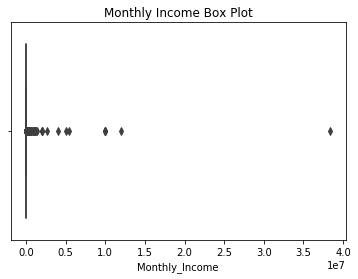

In [62]:
sns.boxplot(x=train_df["Monthly_Income"]).set_title("Monthly Income Box Plot")

Text(0.5,1,'Lop1p Monthly Income Box Plot')

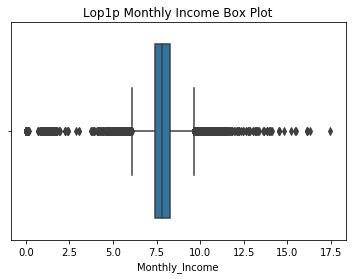

In [65]:
sns.boxplot(x=np.log1p(train_df["Monthly_Income"])).set_title("Lop1p Monthly Income Box Plot")

Text(0.5,1,'Log1p Monthly Income Distribution')

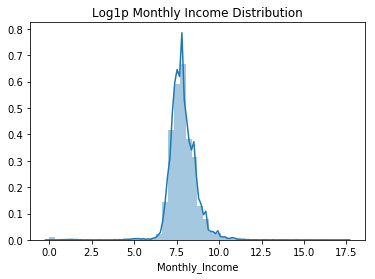

In [67]:
sns.distplot(np.log1p(train_df["Monthly_Income"])).set_title("Log1p Monthly Income Distribution")

The income distribution was very skewed. A log1p transformation corrects this skewness and therefore, should be used for feature engineering

#### Distributions of Loan_Amount, Existing_EMI and EMI

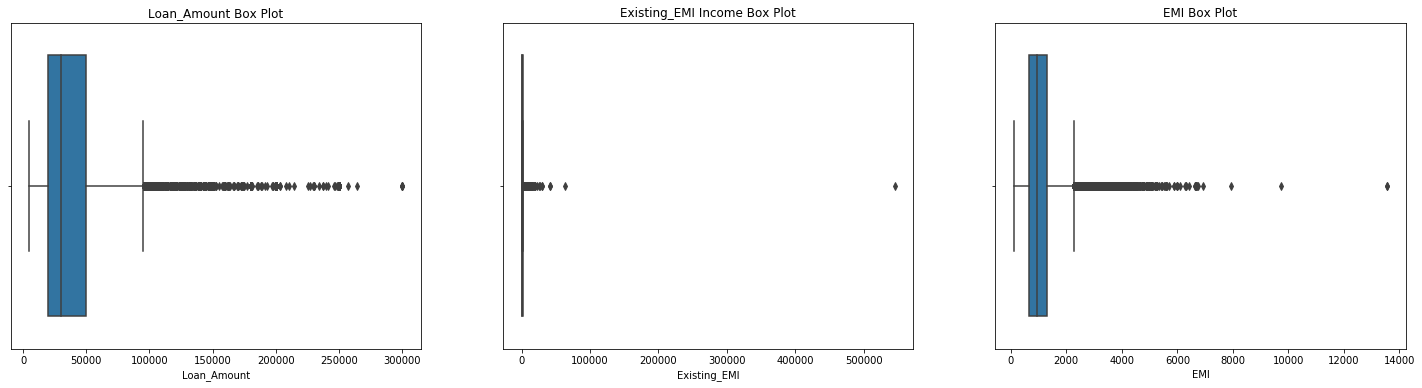

In [83]:
plt.figure(1, figsize=(25, 6))
plt.subplot(131)
sns.boxplot(x=train_df["Loan_Amount"]).set_title("Loan_Amount Box Plot")

plt.subplot(132)
sns.boxplot(x=train_df[train_df.Existing_EMI > 0].Existing_EMI).set_title("Existing_EMI Income Box Plot")

plt.subplot(133)
sns.boxplot(x=train_df["EMI"]).set_title("EMI Box Plot")

plt.show()


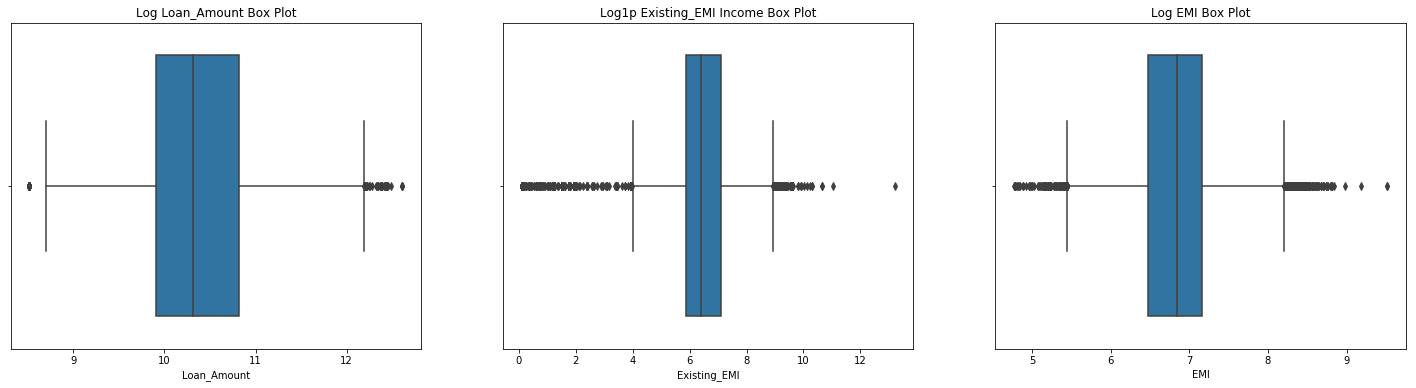

In [84]:
plt.figure(1, figsize=(25, 6))
plt.subplot(131)
sns.boxplot(x=np.log(train_df["Loan_Amount"])).set_title("Log Loan_Amount Box Plot")

plt.subplot(132)
sns.boxplot(x=np.log1p(train_df[train_df.Existing_EMI > 0].Existing_EMI)).set_title("Log1p Existing_EMI Income Box Plot")

plt.subplot(133)
sns.boxplot(x=np.log(train_df["EMI"])).set_title("Log EMI Box Plot")

plt.show()

Log transformations needed to fix all three features because they were all skewed to the right

#### Exploration of Var1

In [87]:
train_df.Var1.value_counts()

0     23308
10    13420
2     13363
7     11948
4      7674
Name: Var1, dtype: int64

It doesnt seem to me that the number values mean much. I will just one hot encode this and see how it does when I come down to dealing with feature importance.

## Feature Engineering

In [3]:
def create_labelencoded_series(series, field_name):
    le = LabelEncoder()
    le.fit(series)
    
    return pd.Series(le.transform(series), name=field_name).to_frame()

def create_age_years_series(series, field_name):
    todays_date = pd.to_datetime('20161001', format='%Y%m%d', errors='ignore')
    date_series = pd.to_datetime(series , format='%d/%m/%y',  errors='ignore')
    age_series = pd.Series((todays_date - date_series).dt.days/365.25 , name=field_name)
    age_series = age_series.apply(lambda d: (d + 100) if d < 0 else d)
    
    return np.floor(age_series).to_frame()
    
def create_age_days_series(series, field_name):
    todays_date = pd.to_datetime('20161001', format='%Y%m%d', errors='ignore')
    date_series = pd.to_datetime(series , format='%d/%m/%y',  errors='ignore')
    age_series = pd.Series((todays_date - date_series).dt.days , name=field_name)
    
    return age_series.to_frame()

def fill_na_with_label(series, label):
    return series.fillna(label)

def one_hot_encode(series, prefix_label):
    return pd.get_dummies(series, prefix=prefix_label)

def create_log1p_transformed(series, field_name):
    return pd.Series(np.log1p(series), name=field_name).to_frame()

def create_log_transformed(series, field_name):
    return pd.Series(np.log(series), name=field_name).to_frame()

def zero_split_series(series, field_name):
    return pd.Series(series.apply(lambda x: 1 if x > 0 else 0), name=field_name).to_frame()

def label_split_series(series, label, field_name):
    return pd.Series(series.apply(lambda x: 0 if x == label else 1), name=field_name).to_frame()


def create_dependent_vars_df(df):
    gender_enc = create_labelencoded_series(df.Gender, "Gender_Enc")
    age = create_age_years_series(df.DOB, "Age")
    age_of_lead = create_age_days_series(df.Lead_Creation_Date, "Age_Of_Lead")
    
    city_categories = one_hot_encode(df.City_Category, "City_Cat")
    
    filled_employer_code = fill_na_with_label(df.Employer_Code, "NoEmployer")
    has_employer = label_split_series(filled_employer_code, "NoEmployer", "Has_Employer")
    
    emp_cat1_categories = one_hot_encode(df.Employer_Category1, "Employer_Cat1")
    emp_cat2_categories = one_hot_encode(df.Employer_Category2, "Employer_Cat2")
    
    log1p_income = create_log1p_transformed(df.Monthly_Income, "Log1p_Income")
    
    filled_bank_code = fill_na_with_label(df.Customer_Existing_Primary_Bank_Code, "NoBank")
    has_bank = label_split_series(filled_bank_code, "NoBank", "Has_Bank")
    
    bank_type_enc = create_labelencoded_series(df.Primary_Bank_Type.astype('str'), "Bank_Type_Enc")
    contacted_enc = create_labelencoded_series(df.Contacted.astype('str'), "Contacted_Enc")
    
    source_categories = one_hot_encode(df.Source_Category, "Source_Cat")
    
    has_EMI = zero_split_series(df.Existing_EMI, "Has_EMI")
    log1p_existing_EMI = create_log1p_transformed(df.Existing_EMI, "Log1p_Exisiting_EMI")
    
    log_loan_amount = create_log_transformed(df.Loan_Amount, "Log_Loan_Amount")
    log_EMI = create_log_transformed(df.EMI, "Log_EMI")
    
    var1_categories = one_hot_encode(df.Var1, "Var1")
    
    return pd.concat([gender_enc,
                      age,
                      age_of_lead,
                      city_categories,
                      has_employer,
                      emp_cat1_categories,
                      emp_cat2_categories,
                      log1p_income,
                      has_bank,
                      bank_type_enc,
                      contacted_enc,
                      source_categories,
                      has_EMI,
                      log1p_existing_EMI,
                      var1_categories,
                      log_loan_amount,
                      df["Loan_Period"],
                      df["Interest_Rate"],
                      log_EMI,], axis=1)
    

In [4]:
X_train = create_dependent_vars_df(train_df)
Y_train = train_df.Approved

print("The number of rows in X_train: %d" % len(X_train))
print("")
X_train.head(20)

The number of rows in X_train: 69713



,Gender_Enc,Age,Age_Of_Lead,City_Cat_A,City_Cat_B,City_Cat_C,Has_Employer,Employer_Cat1_A,Employer_Cat1_B,Employer_Cat1_C,...,Log1p_Exisiting_EMI,Var1_0,Var1_2,Var1_4,Var1_7,Var1_10,Log_Loan_Amount,Loan_Period,Interest_Rate,Log_EMI
0,0,37.0,78,1,0,0,1,1,0,0,...,0.000000,1,0,0,0,0,NaN,NaN,NaN,NaN
1,1,29.0,89,1,0,0,1,0,0,1,...,0.000000,0,0,0,0,1,9.903488,2.0,13.25,6.859615
2,1,33.0,74,0,0,1,1,0,0,1,...,0.000000,1,0,0,0,0,10.714418,4.0,NaN,NaN
3,1,27.0,84,0,0,1,1,1,0,0,...,0.000000,0,0,0,1,0,11.429544,5.0,NaN,NaN
4,1,31.0,73,1,0,0,1,1,0,0,...,7.824446,0,0,0,0,1,10.819778,2.0,NaN,NaN
5,0,27.0,92,0,0,1,1,1,0,0,...,0.000000,1,0,0,0,0,NaN,NaN,NaN,NaN
6,1,43.0,91,0,1,0,1,0,1,0,...,0.000000,0,0,0,0,1,11.775290,5.0,14.85,8.033334
7,0,25.0,90,1,0,0,1,1,0,0,...,0.000000,1,0,0,0,0,10.308953,3.0,18.25,6.992096
8,1,39.0,91,1,0,0,1,1,0,0,...,0.000000,0,0,0,1,0,11.097410,5.0,20.00,7.466799
9,0,25.0,91,0,1,0,1,1,0,0,...,0.000000,1,0,0,0,0,NaN,NaN,NaN,NaN


### Imputing Nans because not all algorithms can handle them 

In [5]:
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
tmp = pd.DataFrame(imp.fit_transform(X_train.loc[:,"Log_Loan_Amount":"Log_EMI"]))
tmp.columns = X_train.loc[:,"Log_Loan_Amount":"Log_EMI"].columns
tmp.index = X_train.loc[:,"Log_Loan_Amount":"Log_EMI"].index


X_train_imp = pd.concat([X_train.drop(["Log_Loan_Amount", "Loan_Period", "Interest_Rate", "Log_EMI"], axis=1), tmp], axis=1)
X_train_imp.head(20)

,Gender_Enc,Age,Age_Of_Lead,City_Cat_A,City_Cat_B,City_Cat_C,Has_Employer,Employer_Cat1_A,Employer_Cat1_B,Employer_Cat1_C,...,Log1p_Exisiting_EMI,Var1_0,Var1_2,Var1_4,Var1_7,Var1_10,Log_Loan_Amount,Loan_Period,Interest_Rate,Log_EMI
0,0,37.0,78,1,0,0,1,1,0,0,...,0.000000,1,0,0,0,0,10.326622,3.890629,19.21357,6.822990
1,1,29.0,89,1,0,0,1,0,0,1,...,0.000000,0,0,0,0,1,9.903488,2.000000,13.25000,6.859615
2,1,33.0,74,0,0,1,1,0,0,1,...,0.000000,1,0,0,0,0,10.714418,4.000000,19.21357,6.822990
3,1,27.0,84,0,0,1,1,1,0,0,...,0.000000,0,0,0,1,0,11.429544,5.000000,19.21357,6.822990
4,1,31.0,73,1,0,0,1,1,0,0,...,7.824446,0,0,0,0,1,10.819778,2.000000,19.21357,6.822990
5,0,27.0,92,0,0,1,1,1,0,0,...,0.000000,1,0,0,0,0,10.326622,3.890629,19.21357,6.822990
6,1,43.0,91,0,1,0,1,0,1,0,...,0.000000,0,0,0,0,1,11.775290,5.000000,14.85000,8.033334
7,0,25.0,90,1,0,0,1,1,0,0,...,0.000000,1,0,0,0,0,10.308953,3.000000,18.25000,6.992096
8,1,39.0,91,1,0,0,1,1,0,0,...,0.000000,0,0,0,1,0,11.097410,5.000000,20.00000,7.466799
9,0,25.0,91,0,1,0,1,1,0,0,...,0.000000,1,0,0,0,0,10.326622,3.890629,19.21357,6.822990


In [15]:
def prune_features(df):
    df_p = df.drop(["Has_Employer",
                    "Source_Cat_A",
                    "Source_Cat_D",
                    "Source_Cat_E",
                    "Source_Cat_F",
                    "Var1_0",
                    "Var1_2",
                    "Var1_4",
                    "Var1_7",
                    "Var1_10"], axis=1)
    return df_p

X_train_p = prune_features(X_train_imp)
X_test = create_dependent_vars_df(test_df)
X_test_p = prune_features(X_test)

## Method1: XGBoost

### Pruning features to be used in model 

In [16]:
xgb_model = XGBClassifier(gamma=0,
                          subsample=0.8,
                          colsample_bytree=0.8,
                          objective= 'binary:logistic',
                          scale_pos_weight=70,
                          seed=27,
                          n_jobs=-1,
                          learning_rate=0.1)

params = {'max_depth': range(3,10,1), 'min_child_weight': range(1,6,1), 'n_estimators': range(5,30,40)}

gs = GridSearchCV(xgb_model, params, scoring='roc_auc', cv=3, return_train_score=True, n_jobs=1, verbose=5)  
gs.fit(X_train_p, Y_train)


Fitting 3 folds for each of 35 candidates, totalling 105 fits
[CV] max_depth=3, min_child_weight=1, n_estimators=5 .................
[CV]  max_depth=3, min_child_weight=1, n_estimators=5, score=0.8043272466642347, total=   0.2s
[CV] max_depth=3, min_child_weight=1, n_estimators=5 .................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  max_depth=3, min_child_weight=1, n_estimators=5, score=0.8113678692719117, total=   0.2s
[CV] max_depth=3, min_child_weight=1, n_estimators=5 .................
[CV]  max_depth=3, min_child_weight=1, n_estimators=5, score=0.803654408874525, total=   0.1s
[CV] max_depth=3, min_child_weight=2, n_estimators=5 .................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.6s remaining:    0.0s


[CV]  max_depth=3, min_child_weight=2, n_estimators=5, score=0.8043272466642347, total=   0.2s
[CV] max_depth=3, min_child_weight=2, n_estimators=5 .................
[CV]  max_depth=3, min_child_weight=2, n_estimators=5, score=0.8113678692719117, total=   0.1s
[CV] max_depth=3, min_child_weight=2, n_estimators=5 .................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.9s remaining:    0.0s


[CV]  max_depth=3, min_child_weight=2, n_estimators=5, score=0.803654408874525, total=   0.1s
[CV] max_depth=3, min_child_weight=3, n_estimators=5 .................
[CV]  max_depth=3, min_child_weight=3, n_estimators=5, score=0.8043272466642347, total=   0.2s
[CV] max_depth=3, min_child_weight=3, n_estimators=5 .................
[CV]  max_depth=3, min_child_weight=3, n_estimators=5, score=0.8113678692719117, total=   0.1s
[CV] max_depth=3, min_child_weight=3, n_estimators=5 .................
[CV]  max_depth=3, min_child_weight=3, n_estimators=5, score=0.803654408874525, total=   0.1s
[CV] max_depth=3, min_child_weight=4, n_estimators=5 .................
[CV]  max_depth=3, min_child_weight=4, n_estimators=5, score=0.8043272466642347, total=   0.1s
[CV] max_depth=3, min_child_weight=4, n_estimators=5 .................
[CV]  max_depth=3, min_child_weight=4, n_estimators=5, score=0.8113678692719117, total=   0.2s
[CV] max_depth=3, min_child_weight=4, n_estimators=5 .................
[CV]  

[CV]  max_depth=6, min_child_weight=4, n_estimators=5, score=0.7650249583171698, total=   0.3s
[CV] max_depth=6, min_child_weight=5, n_estimators=5 .................
[CV]  max_depth=6, min_child_weight=5, n_estimators=5, score=0.7427748634609752, total=   0.2s
[CV] max_depth=6, min_child_weight=5, n_estimators=5 .................
[CV]  max_depth=6, min_child_weight=5, n_estimators=5, score=0.8221053855204411, total=   0.1s
[CV] max_depth=6, min_child_weight=5, n_estimators=5 .................
[CV]  max_depth=6, min_child_weight=5, n_estimators=5, score=0.7651985618460163, total=   0.2s
[CV] max_depth=7, min_child_weight=1, n_estimators=5 .................
[CV]  max_depth=7, min_child_weight=1, n_estimators=5, score=0.7512860743039464, total=   0.2s
[CV] max_depth=7, min_child_weight=1, n_estimators=5 .................
[CV]  max_depth=7, min_child_weight=1, n_estimators=5, score=0.8170098981159413, total=   0.2s
[CV] max_depth=7, min_child_weight=1, n_estimators=5 .................
[CV]

[Parallel(n_jobs=1)]: Done 105 out of 105 | elapsed:   25.3s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=70,
       seed=27, silent=True, subsample=0.8),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(3, 10), 'min_child_weight': range(1, 6), 'n_estimators': range(5, 30, 40)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=5)

In [17]:
print(gs.best_params_)
print(gs.best_score_)
gs.best_estimator_

{'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 5}
0.816758536506


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=5,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=70,
       seed=27, silent=True, subsample=0.8)

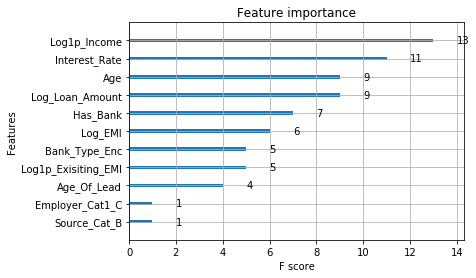

In [18]:

opt_xgb_model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=5,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=70,
       seed=27, silent=True, subsample=0.8)

opt_xgb_model.fit(X_train_p, Y_train)

plot_importance(opt_xgb_model)
plt.show()

### Generate predictions

In [19]:
xgb_y_pred = pd.Series(opt_xgb_model.predict(X_test_p), name="Approved")
submission_xgb = pd.concat([test_df.ID.to_frame(), xgb_y_pred.to_frame()], axis=1)

submission_xgb.to_csv('predictions/xgb_submission9.csv', index=False)

## Method2: Random Forest

In [63]:
params = {
    'class_weight': ["balanced"],
    'max_depth': st.randint(3, 100),
    'max_features': ["auto"],
    'criterion': ["gini","entropy"],
    'n_estimators': range(3, 1000)
         }
            
rf_model = RandomForestClassifier(n_jobs=-1)
gs = RandomizedSearchCV(rf_model, params, n_jobs=1)  
gs.fit(X_train_p, Y_train)  

gs.best_params_

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 31,
 'max_features': 'auto',
 'n_estimators': 608}

In [64]:
opt_rf_params = {
    'class_weight': 'balanced',
    'criterion': 'entropy',
    'max_depth': 31,
    'max_features': 'auto',
    'n_estimators': 608
}

opt_rf_model = XGBClassifier(**opt_rf_params, n_jobs=-1)
kfold = KFold(n_splits=5, random_state=7)
rf_results = cross_val_score(opt_rf_model, X_train_p, Y_train, cv=kfold, scoring='roc_auc')

print("Accuracy: %.2f (%.2f)" % (rf_results.mean(), rf_results.std()))

Accuracy: 0.78 (0.01)


In [65]:
#opt_rf_params = {
#    'class_weight': 'balanced',
#    'criterion': 'gini',
#    'max_depth': 59,
#    'max_features': 'auto',
#    'n_estimators': 786
#}

opt_rf_model = XGBClassifier(**opt_rf_params, n_jobs=-1)
opt_rf_model.fit(X_train_p, Y_train)

rf_y_pred = pd.Series(opt_rf_model.predict(X_test_p), name="Approved")
submission_rf = pd.concat([test_df.ID.to_frame(), rf_y_pred.to_frame()], axis=1)

submission_rf.to_csv('predictions/rf_submission2.csv', index=False)

## Method3: LGBM

In [ ]:
#X_lgbm_train = lgb.Dataset(X_train.as_matrix, label=Y_train.as_matrix)

one_to_left = st.beta(10, 1)  
from_zero_positive = st.expon(0, 50)

lgb_params = {
    'max_depth': range(3, 100),
    'num_leaves': range(3, 100),
    'learning_rate': st.uniform(0.05, 1.0),
    'scale_pos_weight': range(65,75)
}

lgb_model = LGBMClassifier(n_jobs=-1)
gs = RandomizedSearchCV(lgb_model, lgb_params, n_jobs=1)  
gs.fit(X_train_p, Y_train)  

gs.best_params_

In [ ]:
opt_lgb_params = {
    'learning_rate': 0.31769998687084944,
    'max_depth': 27,
    'num_leaves': 93,
    'scale_pos_weight': 67
}

opt_lgb_model = LGBMClassifier(**opt_lgb_params, n_jobs=-1)
kfold = KFold(n_splits=10, random_state=7)
lgb_results = cross_val_score(opt_lgb_model, X_train_p, Y_train, cv=kfold, scoring='roc_auc')

print("Accuracy: %.2f (%.2f)" % (lgb_results.mean(), lgb_results.std()))

In [28]:
#opt_lgb_params = {
#    'learning_rate': 0.31769998687084944,
#    'max_depth': 27,
#    'num_leaves': 93,
#    'scale_pos_weight': 67
#}

opt_lgb_model = LGBMClassifier(**opt_lgb_params, n_jobs=-1)
opt_lgb_model.fit(X_train_p, Y_train)

lgb_y_pred = pd.Series(opt_lgb_model.predict(X_test_p), name="Approved")
submission_lgb = pd.concat([test_df.ID.to_frame(), lgb_y_pred.to_frame()], axis=1)

submission_lgb.to_csv('predictions/lgb_submission2.csv', index=False)

## Stacking models 

In [36]:
test_xgb = pd.Series(submission_xgb.Approved, name="Approved_xgb")
test_rf = pd.Series(submission_rf.Approved, name="Approved_rf")
test_lgb = pd.Series(submission_lgb.Approved, name="Approved_lgb")

train_xgb = pd.Series(opt_xgb_model.predict(X_train), name="Approved_xgb")
train_rf = pd.Series(opt_rf_model.predict(X_train_imp), name="Approved_rf")
train_lgb = pd.Series(opt_lgb_model.predict(X_train), name="Approved_lgb")

all_train_targets = pd.concat([train_xgb, train_rf, train_lgb], axis=1)
all_test_targets = pd.concat([test_xgb, test_rf, test_lgb], axis=1)

stack_model = XGBClassifier(n_jobs=-1)
stack_model.fit(all_targets, Y_train)
stack_pred = pd.Series(stack_model.predict(all_test_targets), name="Approved")

submission_stack = pd.concat([test_df.ID.to_frame(), stack_pred.to_frame()], axis=1)
submission_stack.to_csv('predictions/stack_submission2.csv', index=False)